In [1]:
# import packages
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import DataLoader, Dataset
from torchvision import datasets, transforms
from tqdm import tqdm

In [23]:
# set the random seed
np.random.seed(2)
torch.manual_seed(2)

In [24]:
# check if CUDA is available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [25]:
# hyperparameters
learning_rate = 0.0001
batch_size = 128
num_epochs = 30
num_classes = 10

In [26]:
# define transforms for the data
transform = transforms.Compose(
    [
        transforms.ToTensor(),
        transforms.Normalize((0.1307,), (0.3081,)),
    ]
)

In [27]:
# download the dataset
train_data = datasets.MNIST(root='./data', train=True, transform=transform, download=True)
val_data = datasets.MNIST(root='./data', train=False, transform=transform, download=True)

# create the dataloader
train_loader = DataLoader(dataset=train_data, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(dataset=val_data, batch_size=batch_size, shuffle=False)

In [28]:
# create the CNN model
class Model(nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.fc1 = nn.Linear(64*7*7, 128)
        self.fc2 = nn.Linear(128, 10)
        self.dropout = nn.Dropout(0.5)
        self.maxpool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.relu = nn.ReLU()
        self.softmax = nn.Softmax(dim=1)
    
    def forward(self, x):
        x = self.relu(self.conv1(x))
        x = self.maxpool(x)
        x = self.relu(self.conv2(x))
        x = self.maxpool(x)
        x = x.view(-1, 64*7*7)
        x = self.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        return self.softmax(x)
        

In [29]:
# create the model
model = Model().to(device)
# loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

In [30]:
# record the loss and accuracy
train_acc, val_acc = [], []
train_loss, val_loss = [], []

# train and validate the model
for epoch in range(num_epochs):
    print(f"\nEpoch {epoch+1:2d}/{num_epochs:2d}")
    model.train()
    running_loss, running_acc = 0.0, 0.0
    for (images, labels) in tqdm(train_loader):
        images = images.to(device)
        labels = labels.to(device)

        # forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # backward pass
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # calculate the running loss and accuracy
        running_loss += loss.item()
        _, preds = torch.max(outputs, 1)
        running_acc += torch.sum(preds == labels.data).item()

    # calculate the accuracy and loss
    epoch_loss = running_loss / len(train_loader)
    epoch_acc = running_acc / len(train_data)
    train_loss.append(epoch_loss)
    train_acc.append(epoch_acc)

    # validate the model
    model.eval()
    running_loss, running_acc = 0.0, 0.0
    with torch.no_grad():
        for (images, labels) in tqdm(val_loader):
            images = images.to(device)
            labels = labels.to(device)

            # forward pass
            outputs = model(images)
            loss = criterion(outputs, labels)

            # calculate the running loss and accuracy
            running_loss += loss.item()
            _, preds = torch.max(outputs, 1)
            running_acc += torch.sum(preds == labels.data).item()

    # calculate the accuracy and loss
    epoch_loss = running_loss / len(val_loader)
    epoch_acc = running_acc / len(val_data)
    val_loss.append(epoch_loss)
    val_acc.append(epoch_acc)

    print(
        f"Epoch {epoch+1:2d} | Train Loss: {train_loss[-1]:.4f} | Train Acc: {train_acc[-1]:.4f} | Val Loss: {val_loss[-1]:.4f} | Val Acc: {val_acc[-1]:.4f}"
    )


Epoch  1/30


100%|██████████| 79/79 [00:01<00:00, 55.11it/s]


Epoch  1 | Train Loss: 1.7739 | Train Acc: 0.7378 | Val Loss: 1.5472 | Val Acc: 0.9289

Epoch  2/30


100%|██████████| 79/79 [00:01<00:00, 54.59it/s]


Epoch  2 | Train Loss: 1.5620 | Train Acc: 0.9145 | Val Loss: 1.5134 | Val Acc: 0.9528

Epoch  3/30


100%|██████████| 79/79 [00:01<00:00, 54.22it/s]


Epoch  3 | Train Loss: 1.5302 | Train Acc: 0.9414 | Val Loss: 1.4990 | Val Acc: 0.9670

Epoch  4/30


100%|██████████| 79/79 [00:01<00:00, 54.88it/s]


Epoch  4 | Train Loss: 1.5149 | Train Acc: 0.9542 | Val Loss: 1.4913 | Val Acc: 0.9728

Epoch  5/30


100%|██████████| 79/79 [00:01<00:00, 54.74it/s]


Epoch  5 | Train Loss: 1.5066 | Train Acc: 0.9611 | Val Loss: 1.4881 | Val Acc: 0.9762

Epoch  6/30


100%|██████████| 79/79 [00:01<00:00, 54.93it/s]


Epoch  6 | Train Loss: 1.5010 | Train Acc: 0.9649 | Val Loss: 1.4854 | Val Acc: 0.9775

Epoch  7/30


100%|██████████| 79/79 [00:01<00:00, 53.27it/s]


Epoch  7 | Train Loss: 1.4980 | Train Acc: 0.9677 | Val Loss: 1.4835 | Val Acc: 0.9799

Epoch  8/30


100%|██████████| 79/79 [00:01<00:00, 54.97it/s]


Epoch  8 | Train Loss: 1.4943 | Train Acc: 0.9706 | Val Loss: 1.4818 | Val Acc: 0.9815

Epoch  9/30


100%|██████████| 79/79 [00:01<00:00, 53.28it/s]


Epoch  9 | Train Loss: 1.4916 | Train Acc: 0.9733 | Val Loss: 1.4801 | Val Acc: 0.9818

Epoch 10/30


100%|██████████| 79/79 [00:01<00:00, 55.00it/s]


Epoch 10 | Train Loss: 1.4894 | Train Acc: 0.9747 | Val Loss: 1.4799 | Val Acc: 0.9825

Epoch 11/30


100%|██████████| 79/79 [00:01<00:00, 54.81it/s]


Epoch 11 | Train Loss: 1.4885 | Train Acc: 0.9755 | Val Loss: 1.4780 | Val Acc: 0.9843

Epoch 12/30


100%|██████████| 79/79 [00:01<00:00, 54.05it/s]


Epoch 12 | Train Loss: 1.4870 | Train Acc: 0.9769 | Val Loss: 1.4772 | Val Acc: 0.9848

Epoch 13/30


100%|██████████| 79/79 [00:01<00:00, 54.97it/s]


Epoch 13 | Train Loss: 1.4850 | Train Acc: 0.9785 | Val Loss: 1.4762 | Val Acc: 0.9856

Epoch 14/30


100%|██████████| 79/79 [00:01<00:00, 55.43it/s]


Epoch 14 | Train Loss: 1.4842 | Train Acc: 0.9796 | Val Loss: 1.4758 | Val Acc: 0.9858

Epoch 15/30


100%|██████████| 79/79 [00:01<00:00, 53.55it/s]


Epoch 15 | Train Loss: 1.4829 | Train Acc: 0.9807 | Val Loss: 1.4766 | Val Acc: 0.9852

Epoch 16/30


100%|██████████| 79/79 [00:01<00:00, 42.67it/s]


Epoch 16 | Train Loss: 1.4828 | Train Acc: 0.9806 | Val Loss: 1.4755 | Val Acc: 0.9860

Epoch 17/30


100%|██████████| 79/79 [00:01<00:00, 52.71it/s]


Epoch 17 | Train Loss: 1.4817 | Train Acc: 0.9818 | Val Loss: 1.4744 | Val Acc: 0.9872

Epoch 18/30


100%|██████████| 79/79 [00:01<00:00, 50.39it/s]


Epoch 18 | Train Loss: 1.4808 | Train Acc: 0.9822 | Val Loss: 1.4745 | Val Acc: 0.9869

Epoch 19/30


100%|██████████| 79/79 [00:02<00:00, 39.14it/s]


Epoch 19 | Train Loss: 1.4805 | Train Acc: 0.9828 | Val Loss: 1.4734 | Val Acc: 0.9886

Epoch 20/30


100%|██████████| 79/79 [00:02<00:00, 30.57it/s]


Epoch 20 | Train Loss: 1.4790 | Train Acc: 0.9840 | Val Loss: 1.4746 | Val Acc: 0.9870

Epoch 21/30


100%|██████████| 79/79 [00:01<00:00, 49.17it/s]


Epoch 21 | Train Loss: 1.4786 | Train Acc: 0.9844 | Val Loss: 1.4732 | Val Acc: 0.9888

Epoch 22/30


100%|██████████| 79/79 [00:01<00:00, 39.66it/s]


Epoch 22 | Train Loss: 1.4786 | Train Acc: 0.9845 | Val Loss: 1.4735 | Val Acc: 0.9884

Epoch 23/30


100%|██████████| 79/79 [00:01<00:00, 47.65it/s]


Epoch 23 | Train Loss: 1.4775 | Train Acc: 0.9853 | Val Loss: 1.4729 | Val Acc: 0.9887

Epoch 24/30


100%|██████████| 79/79 [00:01<00:00, 50.16it/s]


Epoch 24 | Train Loss: 1.4770 | Train Acc: 0.9856 | Val Loss: 1.4731 | Val Acc: 0.9885

Epoch 25/30


100%|██████████| 79/79 [00:01<00:00, 49.74it/s]


Epoch 25 | Train Loss: 1.4766 | Train Acc: 0.9860 | Val Loss: 1.4734 | Val Acc: 0.9881

Epoch 26/30


100%|██████████| 79/79 [00:01<00:00, 49.61it/s]


Epoch 26 | Train Loss: 1.4763 | Train Acc: 0.9864 | Val Loss: 1.4726 | Val Acc: 0.9893

Epoch 27/30


100%|██████████| 79/79 [00:01<00:00, 47.03it/s]


Epoch 27 | Train Loss: 1.4763 | Train Acc: 0.9863 | Val Loss: 1.4727 | Val Acc: 0.9887

Epoch 28/30


100%|██████████| 79/79 [00:01<00:00, 50.16it/s]


Epoch 28 | Train Loss: 1.4754 | Train Acc: 0.9871 | Val Loss: 1.4726 | Val Acc: 0.9886

Epoch 29/30


100%|██████████| 79/79 [00:01<00:00, 48.41it/s]


Epoch 29 | Train Loss: 1.4751 | Train Acc: 0.9874 | Val Loss: 1.4718 | Val Acc: 0.9894

Epoch 30/30


100%|██████████| 79/79 [00:01<00:00, 50.47it/s]

Epoch 30 | Train Loss: 1.4748 | Train Acc: 0.9877 | Val Loss: 1.4714 | Val Acc: 0.9901


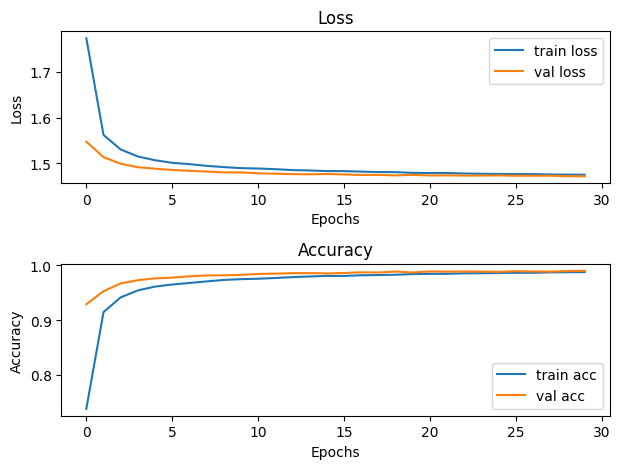

In [31]:
# plot loss and accuracy
plt.figure()
# loss
plt.subplot(2,1,1)
plt.plot(train_loss, label='train loss')
plt.plot(val_loss, label='val loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss')
# accuracy
plt.subplot(2,1,2)
plt.plot(train_acc, label='train acc')
plt.plot(val_acc, label='val acc')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy')
# save figure
plt.tight_layout()
plt.savefig('mnist.png')
plt.show()

In [34]:
# save the model
torch.save(model.state_dict(), 'mnist.pth')